<b> REFERENCES </b>

http://matplotlib.org/api/dates_api.html?highlight=dateformatter#matplotlib.dates.DateFormatter.strftime
http://blog.yhathq.com/posts/ggplot-for-python.html

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit

http://scikit-learn.org/stable/auto_examples/index.html

https://docs.python.org/2/library/datetime.html

http://stackoverflow.com/questions/2394235/detecting-a-us-holiday

http://nbviewer.ipython.org/github/justmarkham/DAT4/blob/master/notebooks/08_linear_regression.ipynb

http://www.itl.nist.gov/div898/handbook/pri/section2/pri24.htm

http://stackoverflow.com/questions/11587782/creating-dummy-variables-in-pandas-for-python

https://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U_test#Normal_approximation

http://matplotlib.org/api/dates_api.html?highlight=dateformatter#matplotlib.dates.DateFormatter.strftime

http://blog.yhathq.com/posts/ggplot-for-python.html

http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist

http://www.statsoft.com/Textbook/Multiple-Regression#cresidual

Some nice reads for regression models
http://blog.minitab.com/blog/adventures-in-statistics/why-you-need-to-check-your-residual-plots-for-regression-analysis
http://blog.minitab.com/blog/adventures-in-statistics/how-high-should-r-squared-be-in-regression-analysis

<b>Section 1. Statistical Test</b>

<b>1.1 Which statistical test did you use to analyze the NYC subway data? Did you use a one-tail or a two-tail P value? What is  the null hypothesis? What is your p-critical value? </b>


<par> 

</par>



We will be using the MannWhitney U test to analyze the subway data. 
We will use a two-tailed P value to test the hypothesis.

Null Hypothesis implies that distribution of both the population( rain and no-rain) are equal.

The p-critical value (p) <= 0.05

<p> 
</p>

<b>1.2 Why is this statistical test applicable to the dataset? In particular, consider the assumptions that the test is making about the distribution of ridership in the two samples. </b>


MannWitney-U test assumes that the data is ordinal(has a kind of rank-order and does not differ by a constant value) which is true in case of mesuring number of hourly entries. 

Secondly, Looking a the probability plot it can be seen that these samples are not normally distributed (are long tailed) thus a non-parametric test like mannwitney u test is more appropriate for comparing both the samples. 


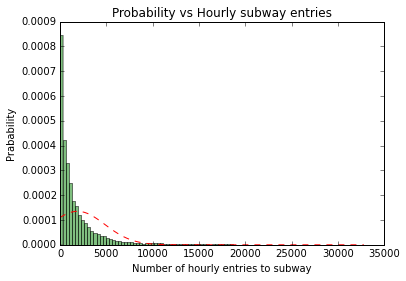

In [3]:

"""
Code to read the subway data and plot a graph for a probility density function
"""
import pandas 
from ggplot import *
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import scipy
import matplotlib.colors  as col
import matplotlib
%matplotlib inline

filename = r'turnstile_weather_v2.csv'  # turnstile_data_master_with_weather.csv
data_nyc = pandas.read_csv(filename)
 
col0 = 'ENTRIESn_hourly'    
n,bins,patches = plt.hist(data_nyc[col0], 100,  normed=1, facecolor='green', alpha=0.5)
y = mlab.normpdf(bins, data_nyc[col0].mean(), data_nyc[col0].std() )
plt.plot(bins,y, 'r--')
plt.subplots_adjust(left=0.15)
plt.xlabel('Number of hourly entries to subway')
plt.ylabel('Prabability')
plt.title('Probability vs Hourly subway entries')

<b>
1.3 What results did you get from this statistical test? These should include the following numerical values: p-values, as well as the means for each of the two samples under test. </b>

In [52]:
"""
Code to calculate the mannwhitneyu test
"""
rain_data = data_nyc[data_nyc.rain == 1]
no_rain_data = data_nyc[data_nyc.rain == 0]
#rain_data.fillna(0)
#no_rain_data.fillna(0)
rain_data.describe()
print 'sample size of rain group = ', len(rain_data)
print 'sample of no-rain group   =', len(no_rain_data)
U,p =  scipy.stats.mannwhitneyu(no_rain_data[col0], rain_data[col0])
print 'M_rain ( Sample mean for rain)     = ', rain_data[col0].mean()
print 'M_no_rain_mean (Sample mean for no-rain)    = ', no_rain_data[col0].mean()
print 'Difference between two group means: ',  rain_data[col0].mean()-no_rain_data[col0].mean()
print 'Two ended p value = ', p*2


sample size of rain group =  9585
sample of no-rain group   = 33064
M_rain ( Sample mean for rain)     =  2028.19603547
M_no_rain_mean (Sample mean for no-rain)    =  1845.53943866
Difference between two group means:  182.656596808
Two ended p value =  5.48213914249e-06


<b> 1.4 What is the significance and interpretation of these results? </b>


Looking at the results of the mannwhitneyu tests we can conclude that as the p values of  5.48213914249e-06 is less than 0.05 thus we reject the null hypothesis. This further implies that both the samples are significantly different.

<b>Section 2. Linear Regression <b>

<par>
</par>
    
2.1 What approach did you use to compute the coefficients theta and produce prediction for ENTRIESn_hourly in your regression model:
OLS using Statsmodels or Scikit Learn
Gradient descent using Scikit Learn
Or something different?




I will be using both statsmodels and Scikit lean to compute the coefficients theta.

In [5]:
"""
Code to implement OLS using statsmodels
"""
import datetime
import statsmodels.api as sm
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
holidays = cal.holidays(start='2011-01-01', end='2011-12-31').to_pydatetime()

"""
is_holiday
Check for weekends as well as federal holidays
"""
def is_holiday(x):
    d = datetime.datetime.strptime(x, '%m-%d-%y')    
    if d in holidays:
        return 1
    else:
        return 0
    

data_nyc['HOLIDAY_LIST'] = data_nyc['DATEn'].apply(is_holiday)

## Adding dummy feature unit
x_unit_dummy = pandas.get_dummies(data_nyc['UNIT'], prefix='unit_')

## Adding feature rain
x = x_unit_dummy.join(data_nyc['rain'])       # r2 = 0.372

## Adding dummy feature weather condition
x_weather_cond_dummy = pandas.get_dummies(data_nyc['conds'], prefix='weather_cond_',dummy_na=True)
x = x.join(x_weather_cond_dummy)              # r2 = 0.379  delta = 0.007

## Adding dymmy featyre holidays (if any)
x = x.join(data_nyc['HOLIDAY_LIST'])          # r2 = 0.382  delta = 0.003

## Adding dymmy feature station
#x_station = pandas.get_dummies(data_nyc['station'], prefix='station_')
#x = x.join(x_station)                       # r2 = 0.382  delta = 0.000

## Adding feature hour
x_hour_dummy = pandas.get_dummies(data_nyc['hour'], prefix='hour_')
x = x.join(x_hour_dummy)                     # r2 = 0.521 delta=0.139

## Adding feature day_week
x_day_week = pandas.get_dummies(data_nyc['day_week'], prefix='day_')
x = x.join(x_day_week)                      # r2 = 0.546 delta = 0.025

## Adding feature fog
#x = x.join(data_nyc['fog'])

## Adding feature weekday
#x = x.join(data_nyc['weekday'])


In [6]:

## Adding dummy feature weather_longitude
#x_weather_dummy = pandas.get_dummies(data_nyc['weather_lon'], prefix='weather_long_')
#x = x.join(x_weather_dummy)                 # r2 = 0.546 delta = 0.000

x_weather_dummy = pandas.get_dummies(data_nyc['tempi'], prefix='tempi')
x = x.join(x_weather_dummy)                 # r2 = 0.553 delta = 0.007

x_wspdi_dummy = pandas.get_dummies(data_nyc['wspdi'], prefix='wspdi_')
x = x.join(x_wspdi_dummy)                    # r2 = 0.555 delta = 0.002

## Calculate least squares
lm = sm.OLS (data_nyc[col0], sm.add_constant(x), missing='none').fit()

print lm.summary()

                            OLS Regression Results                            
Dep. Variable:        ENTRIESn_hourly   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     160.9
Date:                Tue, 29 Sep 2015   Prob (F-statistic):               0.00
Time:                        22:11:57   Log-Likelihood:            -3.8388e+05
No. Observations:               42649   AIC:                         7.684e+05
Df Residuals:                   42316   BIC:                         7.713e+05
Df Model:                         332                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------
unit__R003  

In [7]:
"""
Code using scikit learn 
"""
from sklearn import linear_model
clf = linear_model.Ridge(fit_intercept=False, normalize=False)
clf.fit(x, data_nyc[col0])
print clf.coef_
print clf.intercept_
print clf.score(x, data_nyc[col0])



[ -1.62448319e+03  -1.26181343e+03  -1.26181911e+03  -1.09716959e+03
  -1.45150817e+03  -1.45649997e+03  -1.45767182e+03   5.51033406e+03
   6.85752306e+03   7.88592575e+02  -1.02246091e+03   2.39495086e+03
   6.02631260e+03   1.51915066e+03   4.55941076e+03   2.87787213e+03
   7.68698830e+03   4.34015942e+03   1.47658128e+03   3.60482981e+03
   1.17163001e+03   5.41081183e+03   1.30308990e+03   2.54816477e+03
   2.64325053e+03   6.41041076e+03  -6.73188569e+02   9.99175575e+02
  -9.85798743e+02  -8.68202082e+02  -1.51779469e+03  -9.93204504e+02
  -4.68936130e+02   1.30290274e+03  -1.19591108e+03   1.09117546e+03
   2.87300434e+03   6.51984926e+03   9.77458886e+02   2.22467480e+03
   3.32657119e+03  -5.06542989e+02   1.44777476e+03  -3.31134777e+02
   6.58278875e+03  -3.44779451e+02   3.07630381e+03  -1.14310446e+03
  -5.99927326e+02  -9.95287922e+02  -1.20286693e+03   9.41640704e+02
  -6.56839264e+02  -9.50582499e+02  -9.57898901e+02  -1.55244784e+03
  -8.73267851e+02  -1.27314780e+03

<b>2.2 What features (input variables) did you use in your model? Did you use any dummy variables as part of your features? </b>




We used the following input variables, including dummy variables
1. UNIT   ( Dummy Variable)
   unit used to calculate the output
2. rain
   If it rains or not
3. CONDS  (Dummy Variable)
   weather condition at the time of mesurement
4. HOLIDAY_LIST  ( Dummy Variable)
   List of holidays which might effect the ridership
5. HOUR (dummy variable)
   hour of the day when the mesure was taken.
6. DAY_WEEK   ( Dummy Variable)
   Which weekday is being refered to.
7. TEMPI      (Dummy Variable)
   temprature at the time of mesurement
8. WSPDI      (Dummy Variable)
   wind speed at the time of mesurement.

<b>2.3 Why did you select these features in your model? We are looking for specific reasons that lead you to believe that
the selected features will contribute to the predictive power of your model.
Your reasons might be based on intuition. For example, response for fog might be: “I decided to use fog because I thought that when it is very foggy outside people might decide to use the subway more often.”
Your reasons might also be based on data exploration and experimentation, for example: “I used feature X because as soon as I included it in my model, it drastically improved my R2 value.”  <b>


I made an initial selection of features which i thought would make a significant relation to the number of people using the subway like:
 -  unit number ( assuming that the poppulation density of an area also effects the ridership of the unit in that area)
 -  weekday and day_week ( assuming that a weekday or a weekend does have effect on the ridership)
 -  hour of the day ( assumming hours morning and evening hours will have more ridership on weekdays)
 -  rain, (assuming that rain will make people use the subway more.)
 
After staring with the above list of feature i ended up refining and adding more feature to the list trying to achieve a better R^2 (r-squared) value.

I also experimented with meantempii and meanwspdi and saw that these had no effect on the result and ended up using tempi and wspdi which had a very small effect on the outcome. Also noticed that having fog had no effect on the ridership.



 
 

<b>2.4 What are the parameters (also known as "coefficients" or "weights") of the non-dummy features in your linear regression model?</b>

Only non-dummy variable used was rain and its coefficient is = <b> 124.1933  </b>

<b> 2.5 What is your model’s R2 (coefficients of determination) value? </b>


R^2 (coeffcients of determination)  = 0.5580


<b> 2.6 What does this R2 value mean for the goodness of fit for your regression model? Do you think this linear model to predict ridership is appropriate for this dataset, given this R2  value?  </b>

R-squared, also known as the co-efficient of determination is defined as 1-(residual_variability)
Where residual variablity is the releationship between the features and the predictor variable. If there is no relationship this is 1 and thus our R-squared value is 0.

In our model given that R-square value of 0.558 our residual variabilty is (1-0.558=0.442) which implies that we could explain 55.8% of our original variability and are left with 44.2% of residual variability. 

As our models residual variability is 44.2%, which implies our predictor variables are still not able to predict 44.2% of the dataset which is high and thus we can say that our linear model is not accurate.

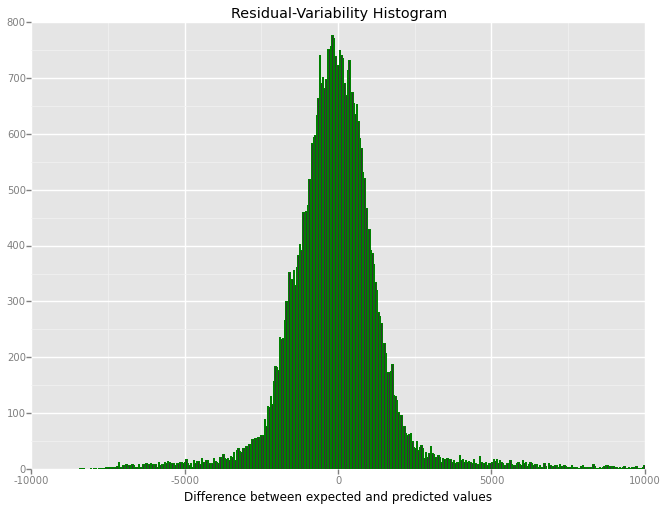

<ggplot: (8756580739793)>


In [44]:
import numpy as np
myx = clf.predict(x)

data_nyc['diff'] =  data_nyc[col0]-myx

p1=ggplot(aes(x='diff'), data_nyc) +  \
    geom_histogram(color='green', binwidth=50)  + xlim(-10000,10000) +\
    xlab('Difference between expected and predicted values') + labs(title='Residual-Variability Histogram ')

print p1

The above graph tries to plot the difference between the original data points and the predicted datapoints (residual values). For an ideal model we would like to see the residual values in and around the 0 mark. Looking at these we can see a high residual variability.

<b> SECTION 3 VISUALIZATIONS </b>


<b> 3.1 One visualization should contain two histograms: one of  ENTRIESn_hourly for rainy days and one of ENTRIESn_hourly for non-rainy days. </b>

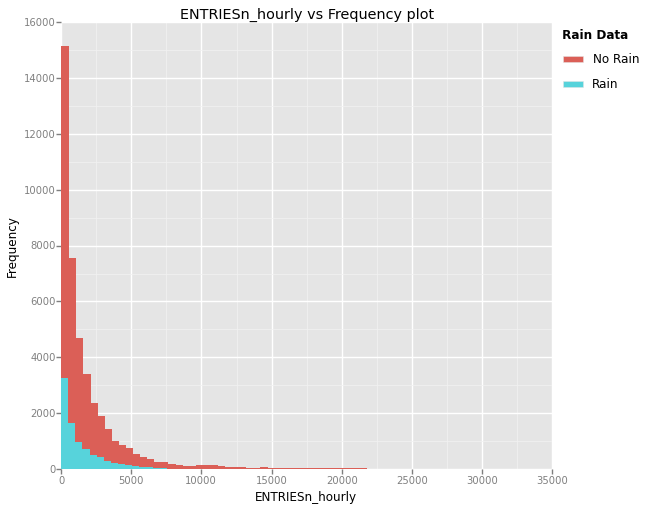

<ggplot: (8766830811789)>


In [210]:
data_nyc['rain data'] = data_nyc['rain'].apply(fill_rain)
r = ggplot(aes(x=col0, fill='rain data', color='rain data'), data=data_nyc)+ labs(title='ENTRIESn_hourly vs Frequency plot') + \
    geom_histogram(binwidth=500) + ylab('Frequency')
print r

From the plot above it can be seen that the shape of both (rain vs no-rain) distribution is identical. But we can clearly see that the number of sample of no-rain data are more than those of rain data.

<b> 3.2 One visualization can be more freeform. You should feel free to implement something that we discussed in class (e.g., scatter plots, line plots) or attempt to implement something more advanced if you'd like. Some suggestions are:

    Ridership by time-of-day
    Ridership by day-of-week  
</b>

In [45]:

import pandas 
import datetime
from ggplot import *
import matplotlib.mlab as mlab
import scipy
%matplotlib inline

col0 = 'ENTRIESn_hourly'
filename = r'turnstile_weather_v2.csv'  # turnstile_data_master_with_weather.csv
data_nyc = pandas.read_csv(filename)

from matplotlib.dates import * 
from ggplot import meat
import matplotlib.pyplot as plt

def converdatetofloat(x):
    d = datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
    return date2num(d)

def converdatetofloat1(x):
    d = datetime.datetime.strptime(x, '%m-%d-%y')
    return date2num(d)
def raintostring(x):
    if x==0:
        return 'No Rain'
    else:
        return 'Rain'
    
# Not able to plot date directly in ggplot due to 
# https://github.com/yhat/ggplot/issues/340
# sideeffect covert date to float number ( day 1, 2, 3  ...)

## Graph for mean-ridership by day
dc_mean = data_nyc[['DATEn',col0, 'rain']].groupby('DATEn', as_index=False).mean()
dc_mean['Rain Legend'] = dc_mean['rain'].apply(raintostring)
dc_mean['mydate']  = dc_mean['DATEn'].apply(converdatetofloat1)
g3 = ggplot(aes(x='mydate', y=col0, fill='Rain Legend'), dc_mean) +scale_x_date(breaks=date_breaks('2 day'), labels = date_format("%a (%d/%m)")) + \
    geom_point(size=100) + geom_line() +  ylab('Mean ENTRIESn_hourly') + xlab('Date') + labs(title='Mean Hourly Ridership by day')
   

## Graph plot median-ridership by day
dc_date = data_nyc[['DATEn',col0, 'rain']].groupby('DATEn', as_index=False).median()
dc_date['Rain Legend'] = dc_date['rain'].apply(raintostring)
dc_date['mydate']  = dc_date['DATEn'].apply(converdatetofloat1)
g5 = ggplot(aes(x='mydate', y=col0, fill='Rain Legend'), dc_date) +scale_x_date(breaks=date_breaks('2 day'), labels = date_format("%a (%d/%m)")) + \
    geom_point(size=100) + geom_line() +  ylab('Median hourly ridership') + xlab('Date') + labs(title='Median Hourly Ridership by day')
    
# Median ridership by daytime
dc = data_nyc[['datetime',col0, 'rain']].groupby('datetime', as_index=False).median()
dc['Rain Legend'] = dc['rain'].apply(raintostring)
dc['mydate']  = dc['datetime'].apply(converdatetofloat)
dc = dc.sort('mydate')
g4 = ggplot(aes(x='mydate', y=col0, fill='Rain Legend'), dc) +   scale_x_date(breaks=date_breaks('2 day'), labels = date_format("%a (%d/%m)")) + \
    geom_point() + geom_line() +  ylab('Median hourly ridership') + xlab('Date-Time') + labs(title='Median Hourly Ridership by daytime')



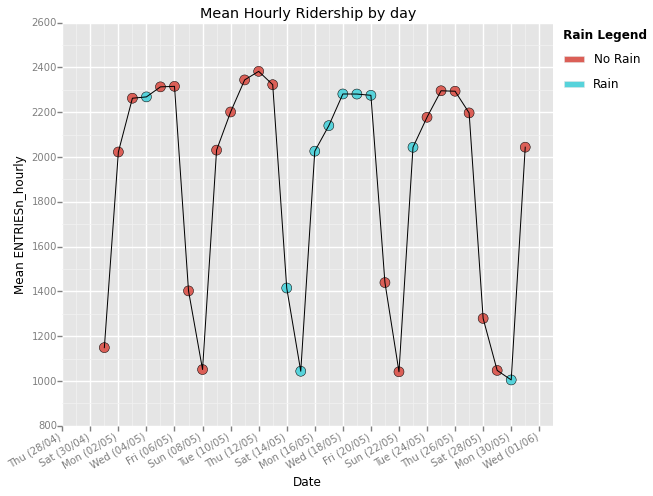

<ggplot: (8756580706137)>


In [46]:
print g3

The above plot tries to plot the relation between days and mean hourly ridership. Mean is a good measure if we want to capture any outliers in the database. In the plot we can see four peeks corresponding to the four weeks and these peeks seems very consistent for all the four weeks even with the 7 consecutive days of rain ( while calculating mean even partial rain is considered as a rainny day). 

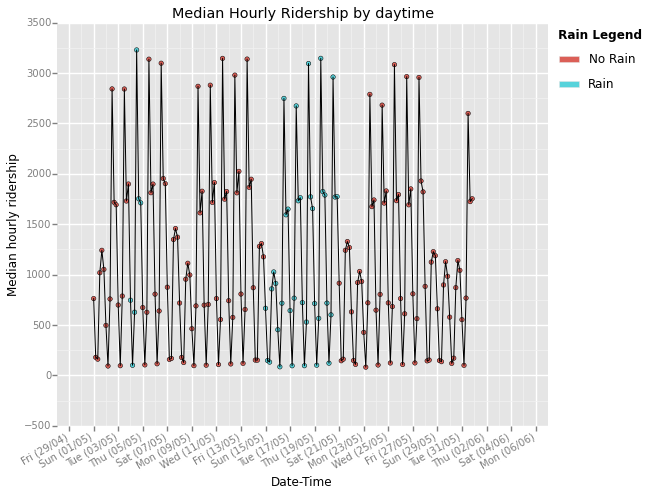

<ggplot: (8756580645661)>


In [47]:
print g4

The above graph tries to plot the date-time and median hourly entries to the NYC subway. This plot gives a more accurate measure as we also account for the time. Looking at this we can see 5 weekdays peaking at a certian time for all the four weeks and dropping over the weekends. Data from the four weeks seems consistent even if we account for the 7 consecutive days of rain and we dont see any increase in ridership for the rainny days.

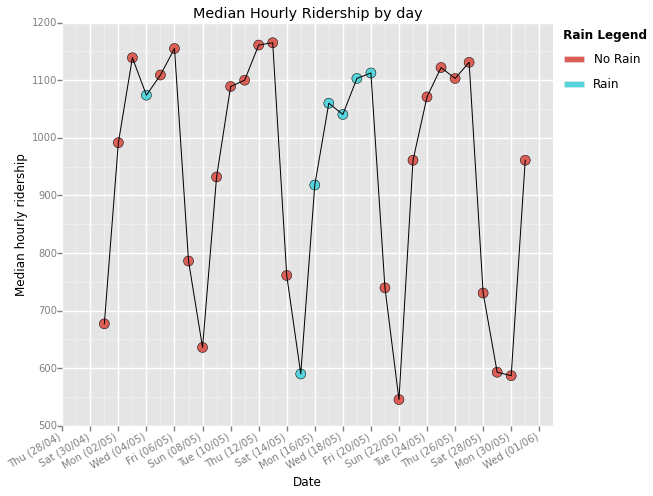

<ggplot: (8756568087133)>


In [48]:
print g5

The above plot tries to show the relationship between median-hourly ridership by day. We can see that the number of median-hourly entries per day is smaller than that of the mean-hourly entries but the relationship seems similar. In this case as-well we do not see any increase in ridership for the consecutive rainy days.

<b> Section 4. Conclusion

Please address the following questions in detail. Your answers should be 1-2 paragraphs long.

4.1 From your analysis and interpretation of the data, do more people ride
the NYC subway when it is raining or when it is not raining?  

</b>



From the analysis above, it cannot be certainly established that the subway ridership increase when its raining.

<b> 4.2 What analyses lead you to this conclusion? You should use results from both your statistical

tests and your linear regression to support your analysis. </b>

Mean between the rain and no-rain population is 182.65,
sample size rain = 9585,
sample size no-rain = 33064,
Statistical analysis of this data (MannWitney U test) only helps us establish the fact that the two distribution as not identical but does not help us to answer if more people ride the subway when its raining or not. The mean difference can also be expained by low sample size of rain data as compared to no-rain data.

In our linermodel we can see that adding rain to our model only increase the R^2 value by 0.001 thus we can conclude that rain does not have a very significant impact on the ridership.

Also looking at the Median/Mean hourly ridership plot by day it can be seen clearly that for the consecutive rainny days from 05/15 to 05/20 the ridership remained consistent and did not increase by any significant amount thus supporting my interpretation of this data.

<b>Section 5. Reflection

Please address the following questions in detail. Your answers should be 1-2 paragraphs long.

5.1 Please discuss potential shortcomings of the methods of your analysis, including:

    Dataset,
    Analysis, such as the linear regression model or statistical test.

</b>


One of the shortcomming of this data is that it is based on a single month of observations. This can lead to things we have not accounted for like holidays in this month or local festivals which might effect the ridership. A better data set would have been year-to-year comparision of the ridershipt for the same month.

One of the assumption of a statistical test like mannwitney u test is that is assumes that we have random sample data. But in this case we are working with one month of data which is not random. 

In terms of linear regression model it seems there are lot of features missing which might effect the data thus we are not able to create a model that has an R^2 value closer to 1 even on this small dataset. Some of those features could be schedule maintainace of subways, un-scheduled intruptions, local festival which might effect the subway.


<b>
5.2 (Optional) Do you have any other insight about the dataset that you would like to share with us?
</b>